# Exercise 5 - Solutions

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
input_dir = Path("data")
output_dir = Path("solution")

# 1. Go to http://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php#datafiles
#    and download the 0.25 deg. file for daily mean temperature.
#    Save the file into the data directory but don't commit it to github!!! [2P]

In [3]:
# 2. Read the file using xarray. Get to know your data. What's in the file?
#    Calculate monthly means for the reference periode 1981-2010 for Europe (Extent: Lon_min:-13, Lon_max: 25, Lat_min: 30, Lat_max: 72). [2P]

# first we open the file using the "open_dataset" method:
ds = xr.open_dataset(input_dir / "tg_ens_mean_0.25deg_reg_v19.0e.nc")

In [ ]:
# select the domain
ds = ds.sel(latitude  = slice(30, 72), longitude = slice(-13, 25))

# then we calculate the mean for the reference period:
monthly_means_ref_time_period = ds.sel(time = slice("1981-01-01", "2010-12-31")).groupby("time.month").mean("time")

In [ ]:
# 3. Calculate monthly anomalies from the reference period for the year 2018 (use the same extent as in #2).
#    Make a quick plot of the anomalies for the region. [2P]

# We calculate the mean for 2018 and just subtract the means of the reference period that we calculated before after that.
monthly_anomalies_2018 = ds.sel(time = "2018").groupby("time.month").mean("time") - monthly_means_ref_time_period

Now we make a quick plot using the thin `matplotlib` wrapper xarray implements.

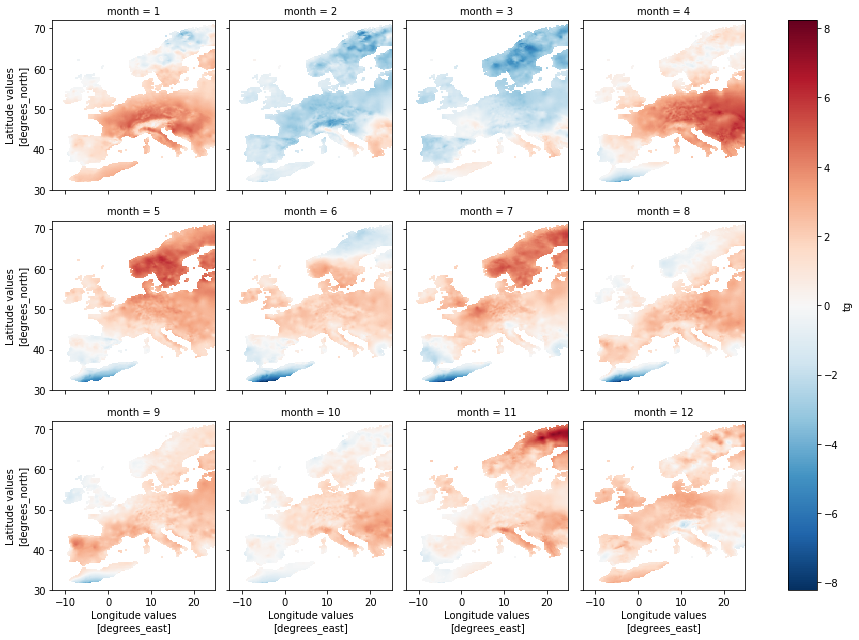

In [6]:
monthly_anomalies_2018["tg"].plot(x="longitude", y="latitude", col="month", col_wrap=4)

In [21]:
# 4. Calculate the mean anomaly for the year 2018 for Europe (over all pixels of the extent from #2) 
#    Compare this overall mean anomaly to the anomaly of the pixel which contains Marburg. 
#    Is the anomaly of Marburg lower or higher than the one for Europe? [2P] 

# First, we calculate average temperature values of the reference time period
overall_anomaly_2018 = monthly_anomalies_2018.mean(["month", "latitude", "longitude"])

# Then we calculate the anomaly value of Marburg
marburg_anomaly_2018 = monthly_anomalies_2018.sel(longitude=8.766166, latitude=50.802082, method="nearest").mean("month")

print("Europe anomaly: {}".format(overall_anomaly_2018["tg"].values))
print("Marburg anomaly: {}".format(marburg_anomaly_2018["tg"].values))

# --> The anomaly in Marburg is higher 

Europe anomaly: 1.094286322593689
Marburg anomaly: 1.5512858629226685


In [ ]:
# 5. Write the monthly anomalies from task 3 to a netcdf file with name "europe_anom_2018.nc" to the solution directory.
#    Write the monthly anomalies for Marburg to a csv file with name "marburg_anom_2018.csv" to the solution directory. [2P]

#monthly_anomalies_2018.to_netcdf(output_dir / "europe_anom_2018.nc")

marburg_monthly_anomalies_df = monthly_anomalies_2018["tg"].sel(longitude=8.766166, latitude=50.802082, method="nearest").to_dataframe()
marburg_monthly_anomalies_df["tg"].to_csv(output_dir / "marburg_anom_2018.csv",header=True)